In [220]:
#Bring in dependancies
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
import numpy as np
import seaborn as sns
from random import sample

In [221]:
fashion_df = pd.read_csv("Resources/mock_fashion_data_uk_us.csv")

fashion_df.head()

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive


In [222]:
fashion_df.groupby("Fashion Influencers")["Brand"].value_counts()

Fashion Influencers  Brand            
Aimee Song           Ralph Lauren         12661
                     Tommy Hilfiger       12591
                     Burberry             12499
                     Alexander McQueen    12448
                     Ted Baker            12438
                                          ...  
Song of Style        Tommy Hilfiger       12427
                     Jigsaw               12414
                     Mulberry             12413
                     Ted Baker            12410
                     Alexander McQueen    12377
Name: Brand, Length: 80, dtype: int64

In [223]:
# get the colour, brand and price from fashion df
d_analysis1 = fashion_df[['Price','Brand', 'Color', 'Age']]
d_analysis1

,Price,Brand,Color,Age
0,97.509966,Ralph Lauren,Green,24
1,52.341277,Ted Baker,Black,61
2,15.430975,Jigsaw,Blue,27
3,81.116542,Alexander McQueen,Red,50
4,31.633686,Tommy Hilfiger,Green,23
...,...,...,...,...
999995,16.255998,Mulberry,Green,37
999996,78.555545,Mulberry,Red,52
999997,34.379639,Mulberry,Red,25
999998,62.343618,Ralph Lauren,Red,29


In [224]:
# find the outliers for number of ratings
brand = ["Alexander McQueen", "Burberry", "Calvin Klein", "Jigsaw", "Mulberry", "Ralph Lauren", "Ted Baker", "Tommy Hilfiger"]
brand_rating = []
# quartiles
for br in brand:
    # Locate the rows that contain the brand
    brand_rate = fashion_df.loc[fashion_df["Brand"]==br, "Rating"]
    # add subset 
    brand_rating.append([brand_rate])
#     Determine outliers using upper and lower bounds
    quartiles = brand_rate.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    print(f"{br}'s potential outliers: Lowerbound: {lowerbound}, UpperBound: {upperbound}")

Alexander McQueen's potential outliers: Lowerbound: -0.9997776321353484, UpperBound: 6.996582876839907
Burberry's potential outliers: Lowerbound: -1.007153382182792, UpperBound: 6.99996854588066
Calvin Klein's potential outliers: Lowerbound: -0.9917266256972037, UpperBound: 6.996292158950727
Jigsaw's potential outliers: Lowerbound: -0.9992663032718805, UpperBound: 6.987176953343147
Mulberry's potential outliers: Lowerbound: -1.0139701764565672, UpperBound: 7.001995265753376
Ralph Lauren's potential outliers: Lowerbound: -0.9981935180931094, UpperBound: 7.007393658479757
Ted Baker's potential outliers: Lowerbound: -0.9958790023712116, UpperBound: 7.0058356473915655
Tommy Hilfiger's potential outliers: Lowerbound: -1.0064792688005286, UpperBound: 6.9938085252871165


In [225]:
mcqueen = fashion_df.loc[fashion_df["Brand"]=="Alexander McQueen's"]
burberry = fashion_df.loc[fashion_df["Brand"]=="Burberry"]
klein = fashion_df.loc[fashion_df["Brand"]=="Calvin Klein"]
jigsaw = fashion_df.loc[fashion_df["Brand"]=="Jigsaw"]
mulberry = fashion_df.loc[fashion_df["Brand"]=="Mulberry"]
ralph = fashion_df.loc[fashion_df["Brand"]=="Ralph Lauren"]
baker = fashion_df.loc[fashion_df["Brand"]=="Ted Baker"]
hilfiger = fashion_df.loc[fashion_df["Brand"]=="Tommy Hilfiger"]

fashion_df["Price"].min()

10.000144517354114

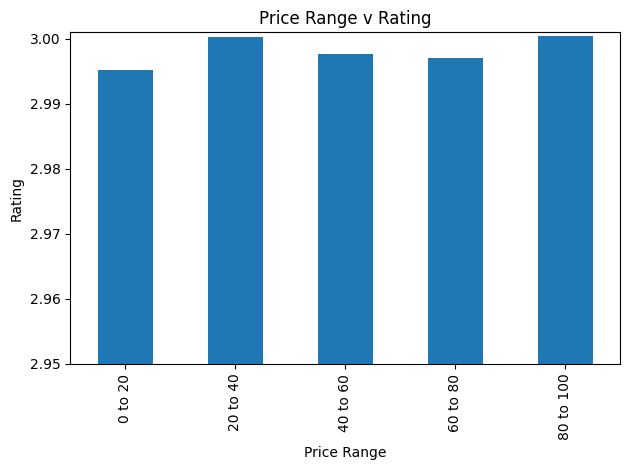

In [226]:
price_bins = [0, 20, 40, 60, 80, 100]
label = ["0 to 20", "20 to 40", "40 to 60", "60 to 80", "80 to 100"]
fashion_df["Price Range"] = pd.cut(fashion_df["Price"], price_bins, labels=label, include_lowest=True)
rating_ave = fashion_df.groupby("Price Range")["Rating"].mean()
rating_ave
fig = rating_ave.plot(kind='bar', x="Price Range", y= "Rating", ylabel= "Rating", ylim=(2.95,3.001), title="Price Range v Rating").get_figure()
plt.tight_layout()
plt.show()
fig.savefig("Output/Ratings.jpg")

In [227]:
print(rating_ave.min(), rating_ave.max())

2.9952615632451796 3.0004912193194544


In [274]:
#set bins and labels for age groups
age_bins = [18,26,34,42,50,58,65]
age_labels = ["18 to 26","26 to 34","34 to 42","42 to 50","50 to 58","58 to 64"]
#add the column to the df
fashion_df["Age Group"] = pd.cut(fashion_df["Age"], age_bins, labels=age_labels)
time_period= fashion_df.groupby("Age Group")["Time Period Highest Purchase"].value_counts()
t_period = pd.DataFrame({"Age 18 to 26": time_period["18 to 26"],"Age 26 to 34":time_period["26 to 34"], "Age 34 to 42":time_period["34 to 42"],
                        "Age 42 to 50": time_period["42 to 50"], "Age 50 to 58": time_period["50 to 58"],"Age 58 to 64":time_period["58 to 64"]})
t_period
labels=["Daytime","Evening","Holiday", "Nighttime","Weekend"]
fig_2 = plt.figure(figsize=(20,20), dpi=800)
ax1=plt.subplot2grid((3,3),(0,0))
plt.pie(t_period["Age 18 to 26"],labels=labels,  autopct="%1.1f%%")
plt.title("Age 18 to 26")

ax1= plt.subplot2grid((3,3),(0,1))
plt.pie(t_period["Age 26 to 34"],labels=labels,  autopct="%1.1f%%")
plt.title("Age 26 to 34")

ax1=plt.subplot2grid((3,3),(1,0))
plt.pie(t_period["Age 34 to 42"],labels=labels,  autopct="%1.1f%%")
plt.title("Age 34 to 42")

ax1=plt.subplot2grid((3,3),(1,1))
plt.pie(t_period["Age 42 to 50"],labels=labels,  autopct="%1.1f%%")
plt.title("Age 42 to 50")

ax1 = plt.subplot2grid((3,3),(2,0))
plt.pie(t_period["Age 50 to 58"],labels=labels,  autopct="%1.1f%%")
plt.title("Age 50 to 58")

ax1 = plt.subplot2grid((3,3),(2,1))
plt.pie(t_period["Age 58 to 64"],labels=labels,  autopct="%1.1f%%")
plt.title("Age 58 to 64")



plt.savefig("Output/Time Period for Shopping.jpg")

In [285]:
st.f_oneway(t_period["Age 18 to 26"],t_period["Age 26 to 34"],t_period["Age 34 to 42"],t_period["Age 42 to 50"],t_period["Age 50 to 58"],t_period["Age 58 to 64"])

F_onewayResult(statistic=1130.1730724528343, pvalue=1.1803598334495626e-27)

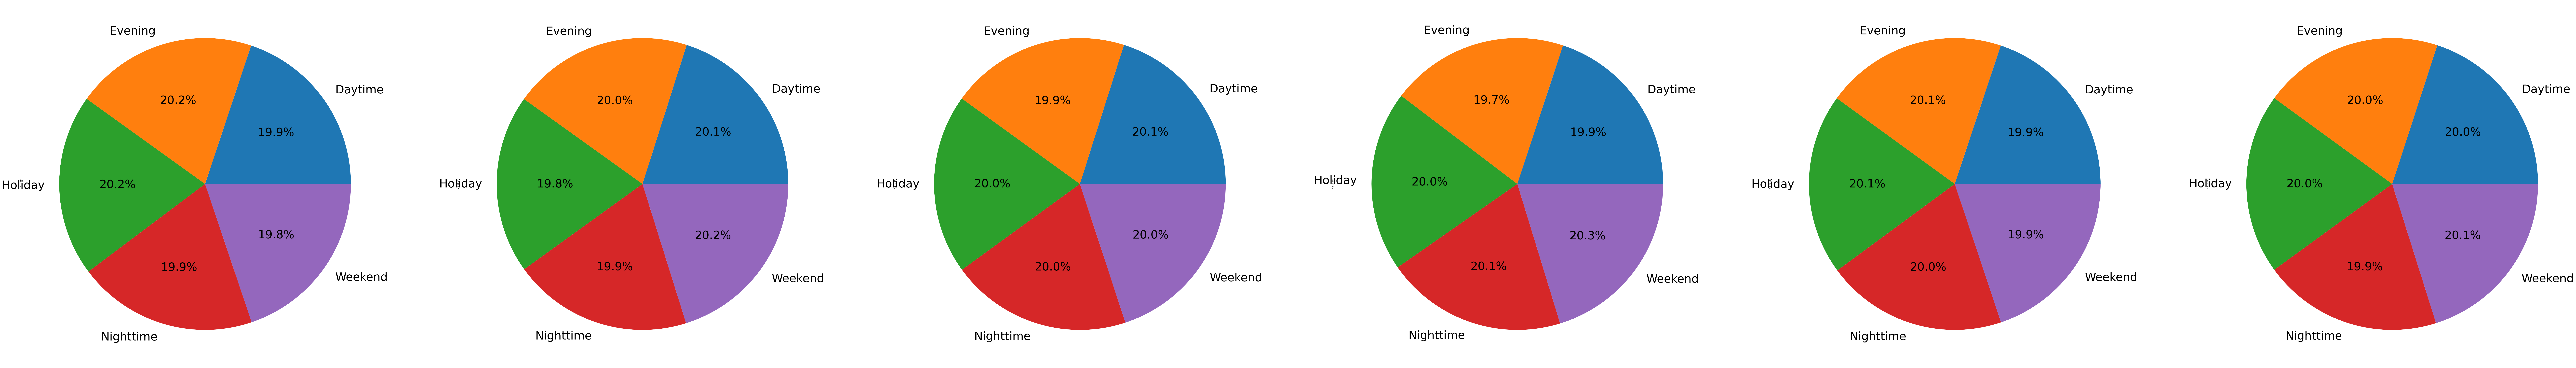

In [246]:
pie_fashion = fashion_df.pivot_table(index=["Time Period Highest Purchase"], columns= "Age Group", aggfunc='count')
pie_fashion["Age"]
pie_fashion.plot.pie(y="Age", subplots=True, legend=False, figsize=(200,100),  autopct="%1.1f%%", fontsize=50)
plt.savefig("Output/Time Period for Shopping.jpg")

In [230]:
t_period.agg({'mean','median','var','std','sem'})

,Age 18 to 26,Age 26 to 34,Age 34 to 42,Age 42 to 50,Age 50 to 58
var,85477.200000,54942.500000,16137.700000,104057.000000,39599.300000
std,292.364841,234.398166,127.034247,322.578673,198.995729
mean,33981.200000,34138.000000,33953.800000,34081.000000,34010.400000
sem,130.749532,104.826046,56.811443,144.261568,88.993595
median,33851.000000,34162.000000,33900.000000,34114.000000,34076.000000


<Axes: >

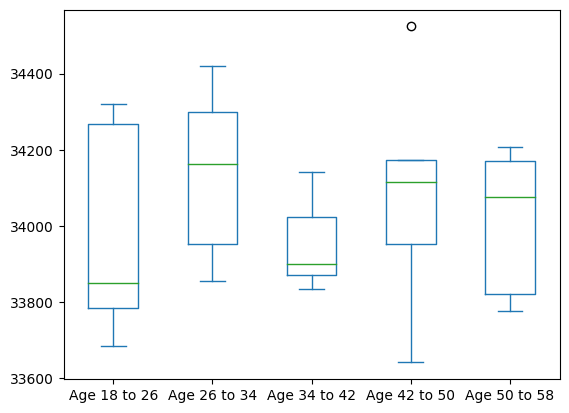

In [231]:
t_period.plot(kind='box')

In [232]:
st.f_oneway(t_period["Age 18 to 26"],t_period["Age 26 to 34"],t_period["Age 34 to 42"],t_period["Age 42 to 50"],
           t_period["Age 50 to 58"])

F_onewayResult(statistic=0.4745696149109785, pvalue=0.7538977087098843)

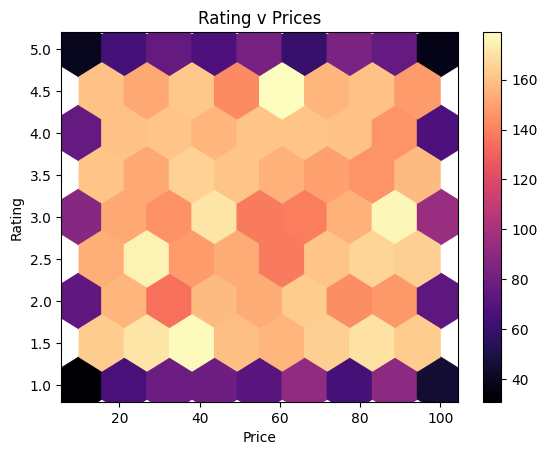

In [233]:
brand_price =fashion_df[["Brand","Price","Rating"]]
sampler = brand_price.sample(n=10000)

fig_2 = sampler.plot(kind='hexbin', x="Price", y="Rating", gridsize = 8, title="Rating v Prices",
                         colorbar=True,colormap="magma",).get_figure()

In [234]:
st.f_oneway(sampler["Price"],sampler["Rating"])

F_onewayResult(statistic=39943.94801281343, pvalue=0.0)

<Axes: ylabel='Frequency'>

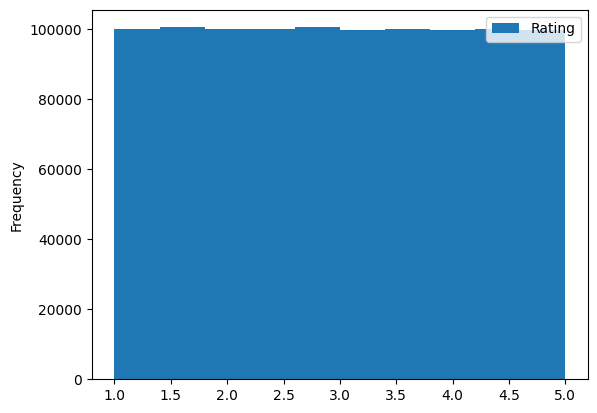

In [235]:
callout = fashion_df.pivot_table(index=["Price"], values= "Rating")
callout.plot.hist()


In [236]:
sampler[["Price", "Rating"]].agg({'mean','median','var','std','sem'})

,Price,Rating
var,677.117138,1.330317
std,26.021475,1.153394
mean,55.045592,2.988057
sem,0.260215,0.011534
median,54.987866,2.978009


In [237]:
fig_2.savefig("Output/Hexagon.png")

In [238]:
fashion_df[["Price","Rating"]].agg({'mean','median','var','std','sem'})

,Price,Rating
var,674.945871,1.333323
std,25.979720,1.154696
mean,55.001428,2.998454
sem,0.025980,0.001155
median,55.007413,2.996328


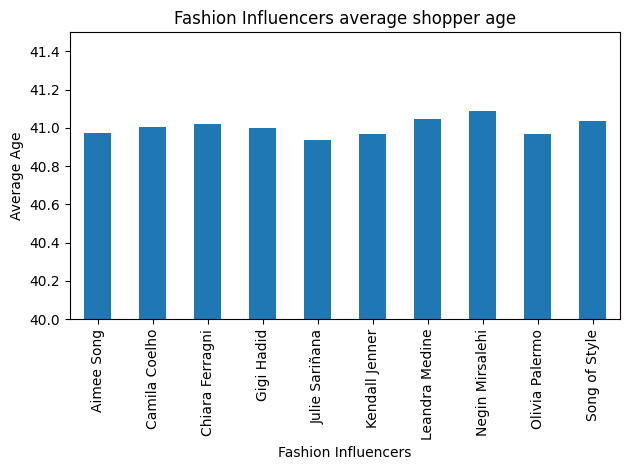

In [239]:
brand_age = fashion_df.pivot_table(values=["Age"],index="Fashion Influencers", aggfunc=(["mean"]))
brand_age.plot.bar(ylim=(40,41.5),legend=False, title= "Fashion Influencers average shopper age", ylabel="Average Age")
plt.tight_layout()
plt.savefig("Output/Influencer average.jpg")

In [240]:
brand_age_2 = fashion_df.pivot_table(values=["Age"],index=["Fashion Influencers"], aggfunc=(['count','mean','median','var','std','sem']))
brand_age_2

,count,mean,median,var,std,sem
,Age,Age,Age,Age,Age,Age
Fashion Influencers,,,,,,
Aimee Song,99783,40.975968,41,184.411421,13.579817,0.042990
Camila Coelho,100273,41.004209,41,183.834472,13.558557,0.042818
Chiara Ferragni,100109,41.018140,41,184.678118,13.589633,0.042951
Gigi Hadid,100122,40.999421,41,184.336552,13.577060,0.042908
Julie Sariñana,99774,40.936326,41,183.928883,13.562038,0.042935
Kendall Jenner,100184,40.970933,41,184.403615,13.579529,0.042903
Leandra Medine,100136,41.044400,41,183.263860,13.537498,0.042780
Negin Mirsalehi,99482,41.086679,41,184.012340,13.565115,0.043008


In [241]:
fashion_df.groupby("Brand")["Age"].mean()

Brand
Alexander McQueen    41.044779
Burberry             41.011986
Calvin Klein         40.974982
Jigsaw               41.013910
Mulberry             40.987671
Ralph Lauren         40.937989
Ted Baker            40.997808
Tommy Hilfiger       41.064386
Name: Age, dtype: float64